## Forward

In [5]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(10, 1)  # Capa lineal de 10 a 1
    
    def forward(self, x):
        x = self.linear(x)  # Transformación lineal
        x = torch.relu(x)   # Función de activación ReLU
        return x

# Datos de entrada
inputs = torch.randn(5, 10)  # 5 ejemplos, 10 características cada uno

# Instanciamos el modelo
model = SimpleModel()

# Forward pass
outputs = model(inputs)
print(outputs)


tensor([[0.2677],
        [0.7497],
        [1.0575],
        [0.0000],
        [1.1136]], grad_fn=<ReluBackward0>)


## Backpropagation

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleModelBackProp(nn.Module):
    def __init__(self):
        super(SimpleModelBackProp, self).__init__()
        self.linear = nn.Linear(10, 1)  # Capa lineal de 10 a 1
    
    def forward(self, x):
        x = self.linear(x)  # Transformación lineal
        x = torch.relu(x)   # Función de activación ReLU
        return x

# Datos de entrada
inputs = torch.randn(5, 10)  # 5 ejemplos, 10 características cada uno
targets = torch.randn(5, 1)  # 5 objetivos

# Instanciamos el modelo
model = SimpleModelBackProp()

# Definimos la función de pérdida
criterion = nn.MSELoss()

# Usamos el optimizador SGD
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Forward pass
outputs = model(inputs)

# Calculamos la pérdida
loss = criterion(outputs, targets)

# Backward pass
optimizer.zero_grad()  # Reiniciamos los gradientes del optimizador
loss.backward()        # Calculamos los gradientes
optimizer.step()       # Actualizamos los parámetros del modelo

# Datos de entrada
inputs = torch.randn(5, 10)  # 5 ejemplos, 10 características cada uno

# Instanciamos el modelo
model = SimpleModelBackProp()

# Forward pass
outputs = model(inputs)
print(outputs)


tensor([[1.1348],
        [0.0000],
        [0.0000],
        [0.3804],
        [0.0000]], grad_fn=<ReluBackward0>)


## L1 Lasso

Epoch 1/100, Loss: 0.2829, Accuracy: 0.4980
Epoch 2/100, Loss: 0.2784, Accuracy: 0.5000
Epoch 3/100, Loss: 0.2788, Accuracy: 0.4980
Epoch 4/100, Loss: 0.2755, Accuracy: 0.4980
Epoch 5/100, Loss: 0.2738, Accuracy: 0.4980
Epoch 6/100, Loss: 0.2733, Accuracy: 0.4980
Epoch 7/100, Loss: 0.2729, Accuracy: 0.4980
Epoch 8/100, Loss: 0.2693, Accuracy: 0.5000
Epoch 9/100, Loss: 0.2684, Accuracy: 0.5010
Epoch 10/100, Loss: 0.2669, Accuracy: 0.5030
Epoch 11/100, Loss: 0.2647, Accuracy: 0.5030
Epoch 12/100, Loss: 0.2658, Accuracy: 0.5040
Epoch 13/100, Loss: 0.2637, Accuracy: 0.4980
Epoch 14/100, Loss: 0.2611, Accuracy: 0.5000
Epoch 15/100, Loss: 0.2604, Accuracy: 0.5010
Epoch 16/100, Loss: 0.2610, Accuracy: 0.5050
Epoch 17/100, Loss: 0.2596, Accuracy: 0.5110
Epoch 18/100, Loss: 0.2579, Accuracy: 0.5140
Epoch 19/100, Loss: 0.2565, Accuracy: 0.5160
Epoch 20/100, Loss: 0.2559, Accuracy: 0.5160
Epoch 21/100, Loss: 0.2556, Accuracy: 0.5140
Epoch 22/100, Loss: 0.2551, Accuracy: 0.5160
Epoch 23/100, Loss:

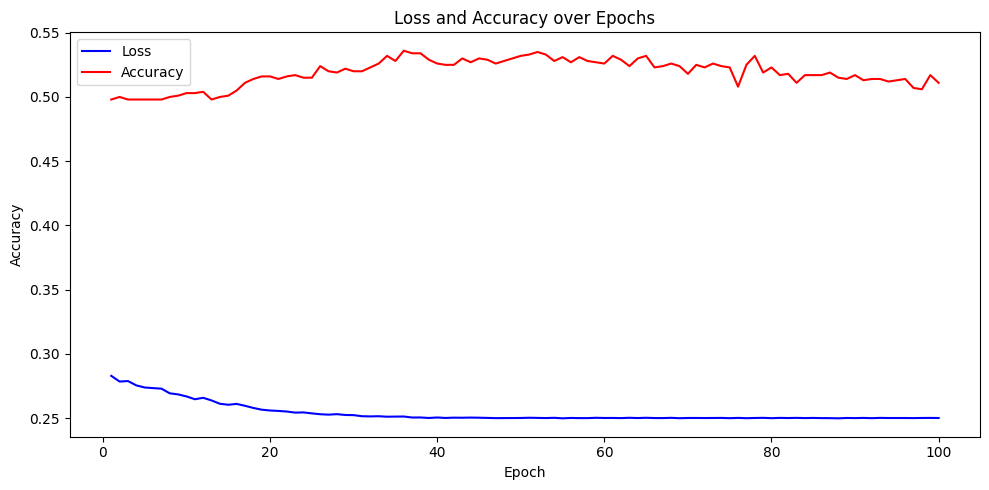

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Generamos un dataset ficticio para un problema de clasificación binaria
torch.manual_seed(0)  # Para reproducibilidad
X = torch.randn(1000, 10)  # 1000 muestras, 10 características cada una
y = (torch.randn(1000, 1) > 0).float()  # 1000 objetivos binarios (0 o 1)

# Creamos un TensorDataset y luego un DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Definimos una clase para un modelo simple con regularización L1
class SimpleModelL1(nn.Module):
    def __init__(self):
        super(SimpleModelL1, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Usamos Sigmoid para la salida binaria

# Instanciamos el modelo
model = SimpleModelL1()

# Definimos la función de pérdida como el error cuadrático medio (MSE)
criterion = nn.MSELoss()

# Usamos el optimizador SGD (descenso de gradiente estocástico) con una tasa de aprendizaje de 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Definimos el factor de regularización L1
l1_lambda = 0.01

# Almacenamos las pérdidas y las precisiones para graficarlas
losses = []
accuracies = []

# Bucle de entrenamiento para 100 épocas
for epoch in range(100):
    epoch_loss = 0.0  # Para acumular la pérdida de la época
    correct_predictions = 0  # Para contar las predicciones correctas
    total_predictions = 0  # Para contar las predicciones totales
    
    for inputs, targets in dataloader:
        # Reiniciamos los gradientes del optimizador
        optimizer.zero_grad()
        
        # Realizamos la pasada hacia adelante (forward pass) del modelo
        outputs = model(inputs)
        
        # Aplicamos la función de pérdida
        loss = criterion(outputs, targets)
        
        # Calculamos la penalización L1 como la suma de los valores absolutos de los parámetros del modelo
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        
        # Añadimos la penalización L1 a la pérdida original
        loss += l1_lambda * l1_norm
        
        # Calculamos los gradientes a través de la retropropagación
        loss.backward()
        
        # Actualizamos los parámetros del modelo
        optimizer.step()
        
        # Acumulamos la pérdida
        epoch_loss += loss.item()
        
        # Calculamos las predicciones correctas
        predicted = (outputs > 0.5).float()
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)
    
    # Promediamos la pérdida de la época y la almacenamos
    epoch_loss /= len(dataloader)
    losses.append(epoch_loss)
    
    # Calculamos y almacenamos la precisión de la época
    accuracy = correct_predictions / total_predictions
    accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{100}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Graficamos la pérdida y la precisión juntas
plt.figure(figsize=(10, 5))

# Gráfico de la pérdida
plt.plot(range(1, 101), losses, label='Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Accuracy over Epochs')

# Gráfico de la precisión
plt.plot(range(1, 101), accuracies, label='Accuracy', color='red')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
